<a href="https://colab.research.google.com/github/dudajustyna020/AddressBook/blob/master/Zadanie7_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Przysza cena mieszkania: 153153.78750000003
Wymagana miesięczna wpłata wynosi około 1875.283538788312
[  1875.28353879   3769.31991296   5682.29665088   7614.40315618
   9565.83072653  11536.77257258  13527.4238371   15537.98161426
  17568.64496919  19619.61495767  21691.09464603  23783.28913128
  25896.40556138  28030.65315578  30186.24322613  32363.38919718
  34562.30662794  36783.21323301  39026.32890413  41291.87573196
  43580.07802806  45891.16234713  48225.35750939  50582.89462328
  52964.0071083   55368.93071817  57797.90356414  60251.16613857
  62728.96133874  65231.53449092  67759.13337461  70312.00824715
  72890.41186841  75494.59952588  78124.82905993  80781.36088932
  83464.458037    86174.38615616  88911.41355651  91675.81123086
  94467.85288196  97287.81494956 100135.97663785 103012.61994301
 105918.02968123 108852.49351683 111816.30199079 114809.74854949
 117833.12957377 120886.7444083  123970.89539117 127085.88788387
 130232.03030149 133409.6341433  136619.01402352 1398

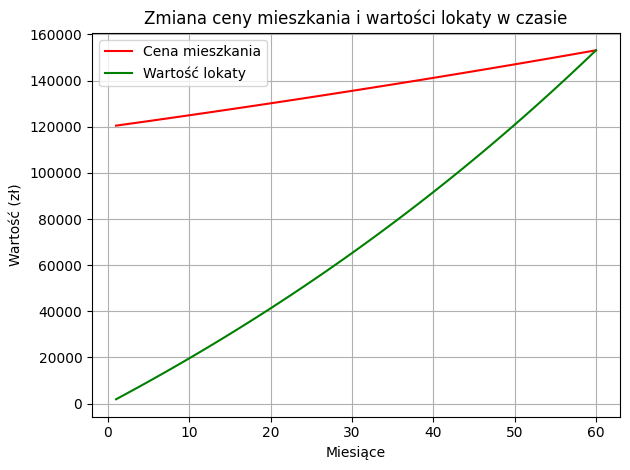

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import numpy_financial as npf

pv = 120000
freq = 12
years = 5
months= 5 * 12
nper= years * 12
rate = 0.12
inflation_rate= 0.05
monthly_rate= rate / freq

new_price = pv * (1 + inflation_rate) ** years #Przyszła cena mieszkania
print(f"Przysza cena mieszkania: {new_price}")

monthly_payment = npf.pmt(rate=monthly_rate, nper=months, pv=0, fv=-new_price, when='end')
print( f"Wymagana miesięczna wpłata wynosi około {monthly_payment}")



monthly_deposit = npf.fv(rate=monthly_rate, nper=np.arange(1, months + 1), pmt=-monthly_payment, pv=0, when='end')
print(monthly_deposit) #wartość lokaty w koljenych miesiącach

monthly_inflation_rate = (1 + inflation_rate) ** (1 / freq) - 1
print(f"Miesięczna stopa inflacji: {monthly_inflation_rate}")

monthly_prices =[pv * (1 + inflation_rate)**(i/12) for i in range(months +1)]
print(f"Miesięczny wzrost ceny mieszkania: {monthly_prices}")

months_table = np.arange(1, months + 1)

plt.plot(months_table, monthly_prices[1:], label='Cena mieszkania', color='red')
plt.plot(months_table, monthly_deposit, label='Wartość lokaty', color='green')
plt.title('Zmiana ceny mieszkania i wartości lokaty w czasie')
plt.xlabel('Miesiące')
plt.ylabel('Wartość (zł)')
plt.legend()
plt.grid(True) #siatkę na wykresie,
plt.tight_layout() #automatycznie dostosowuje rozmieszczenie elementów wykresu
plt.show()


In [8]:
pip install numpy-financial==1.0.0